<div style="text-align: center; font-size: 28px">Boston Marathon Analysis </div>
Team Members:
<div style="text-align: left; font-size: 12px">    Karthik Sunil </div>
<div style="text-align: left; font-size: 12px">    Parth Trivedi </div>
<div style="text-align: left; font-size: 12px">    Meghana Bangalore Srikantha </div>
<div style="text-align: left; font-size: 12px">    Pooja Kuberaiah </div>



In [1]:
!pwd

/Users/parth/Desktop/DS/boston-marathon-analysis-main


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns

/Users/parth/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_2015 = pd.read_csv("marathon_results_2015.csv")
df_2016 = pd.read_csv("marathon_results_2016.csv")
df_2017 = pd.read_csv("marathon_results_2017.csv")

In [4]:
df_2015 = df_2015.drop(['Unnamed: 0', 'Bib','Unnamed: 9','Citizen','Proj Time'], axis = 'columns')
df_2015.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [5]:
df_2016 = df_2016.drop(['Bib','Unnamed: 8','Citizen','Proj Time'], axis = 'columns')
df_2016.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [6]:
df_2017 = df_2017.drop(['Unnamed: 0','Bib','Unnamed: 9','Citizen','Proj Time'], axis = 'columns')
df_2017.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [7]:
print(df_2015.info())
print(df_2016.info())
print(df_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           26598 non-null  object
 1   Age            26598 non-null  int64 
 2   M/F            26598 non-null  object
 3   City           26598 non-null  object
 4   State          24047 non-null  object
 5   Country        26598 non-null  object
 6   5K             26598 non-null  object
 7   10K            26598 non-null  object
 8   15K            26598 non-null  object
 9   20K            26598 non-null  object
 10  Half           26598 non-null  object
 11  25K            26598 non-null  object
 12  30K            26598 non-null  object
 13  35K            26598 non-null  object
 14  40K            26598 non-null  object
 15  Pace           26598 non-null  object
 16  Official Time  26598 non-null  object
 17  Overall        26598 non-null  int64 
 18  Gender         26598 non-n

In [8]:
common_names = set(df_2015['Name']).intersection(set(df_2016['Name']))
df1_common = df_2015[df_2015['Name'].isin(common_names)]
df1_common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 26591
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           5555 non-null   object
 1   Age            5555 non-null   int64 
 2   M/F            5555 non-null   object
 3   City           5555 non-null   object
 4   State          5349 non-null   object
 5   Country        5555 non-null   object
 6   5K             5555 non-null   object
 7   10K            5555 non-null   object
 8   15K            5555 non-null   object
 9   20K            5555 non-null   object
 10  Half           5555 non-null   object
 11  25K            5555 non-null   object
 12  30K            5555 non-null   object
 13  35K            5555 non-null   object
 14  40K            5555 non-null   object
 15  Pace           5555 non-null   object
 16  Official Time  5555 non-null   object
 17  Overall        5555 non-null   int64 
 18  Gender         5555 non-nul

In [9]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017

In [10]:
test_df = pd.concat([df_2015, df_2016, df_2017])
test_df.loc[~test_df['Country'].isin(['USA','CAN']), 'State'] = 'N/A'
test_df = test_df.drop(['Overall', 'Gender', 'Division'], axis='columns')
columns = ['5K','10K','15K','20K','Half','25K','30K','35K','40K','Pace','Official Time']
test_df[columns] = test_df[columns]

In [11]:
time_columns = ['5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace','Official Time']

test_df.replace('-','00:00:00', inplace=True)

#test_df['5K','10K'] = pd.to_datetime(test_df['5K'], format='%H:%M:%S').dt.time

def strTimeToMinutes(timestr):
    time_split = timestr.split(':')
    hours = int(time_split[0])
    minutes = int(time_split[1])
    seconds = int(time_split[2])
    time = hours*60 + minutes + seconds/60
    return time

for time in time_columns:
    test_df[time] = test_df[time].apply(lambda x: strTimeToMinutes(x))



In [12]:
test_df.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year
0,"Desisa, Lelisa",25,M,Ambo,N/A,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,N/A,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015
2,"Chebet, Wilson",29,M,Marakwet,N/A,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015
3,"Kipyego, Bernard",28,M,Eldoret,N/A,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015
4,"Korir, Wesley",32,M,Kitale,N/A,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': '5K'}>,
        <Axes: title={'center': '10K'}>, <Axes: title={'center': '15K'}>],
       [<Axes: title={'center': '20K'}>,
        <Axes: title={'center': 'Half'}>,
        <Axes: title={'center': '25K'}>, <Axes: title={'center': '30K'}>],
       [<Axes: title={'center': '35K'}>, <Axes: title={'center': '40K'}>,
        <Axes: title={'center': 'Pace'}>,
        <Axes: title={'center': 'Official Time'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

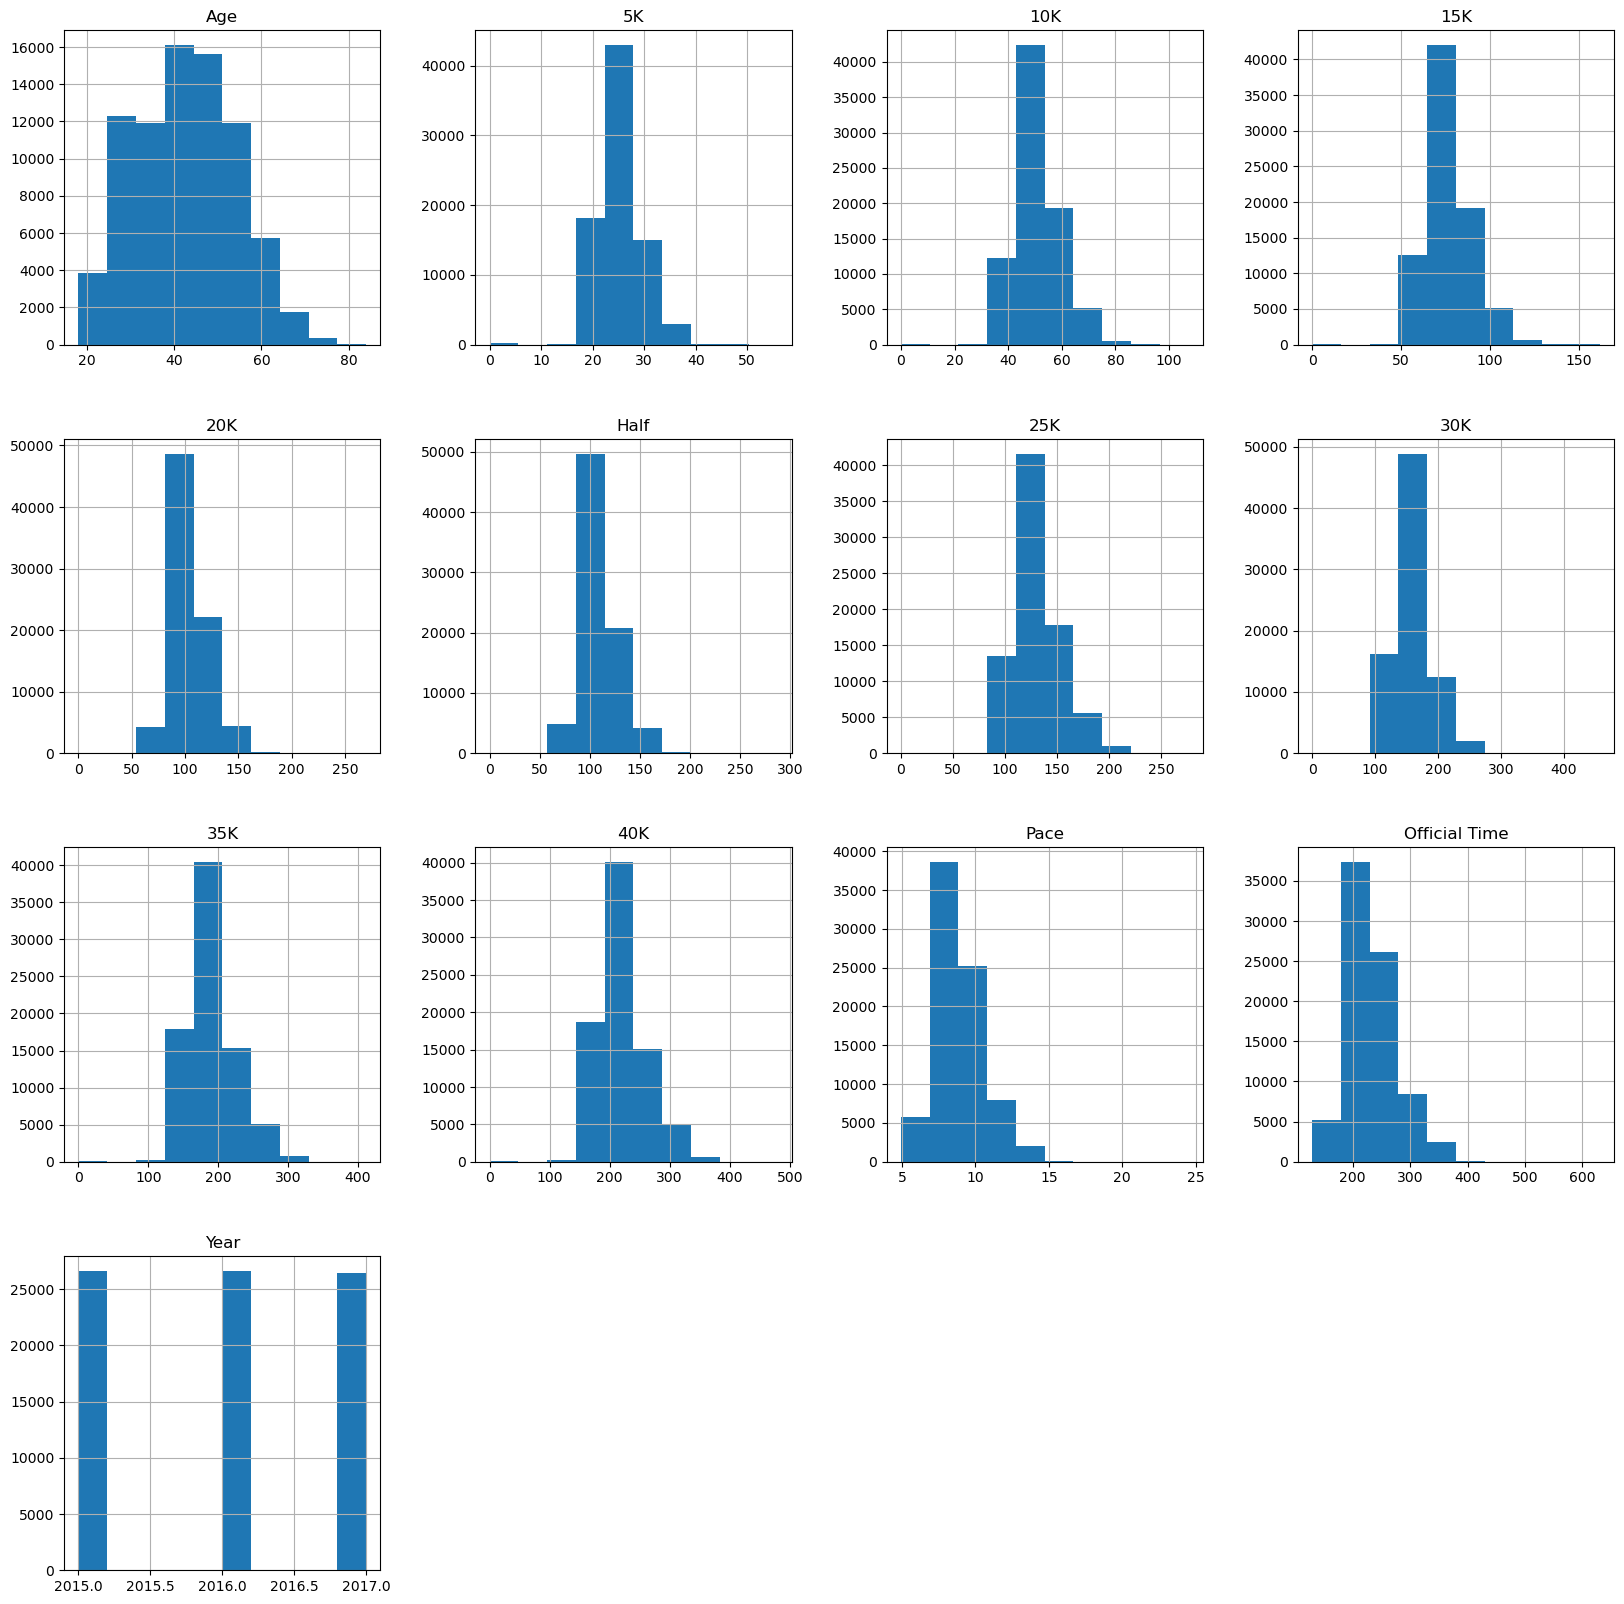

In [13]:
test_df.hist(figsize=(20,20))

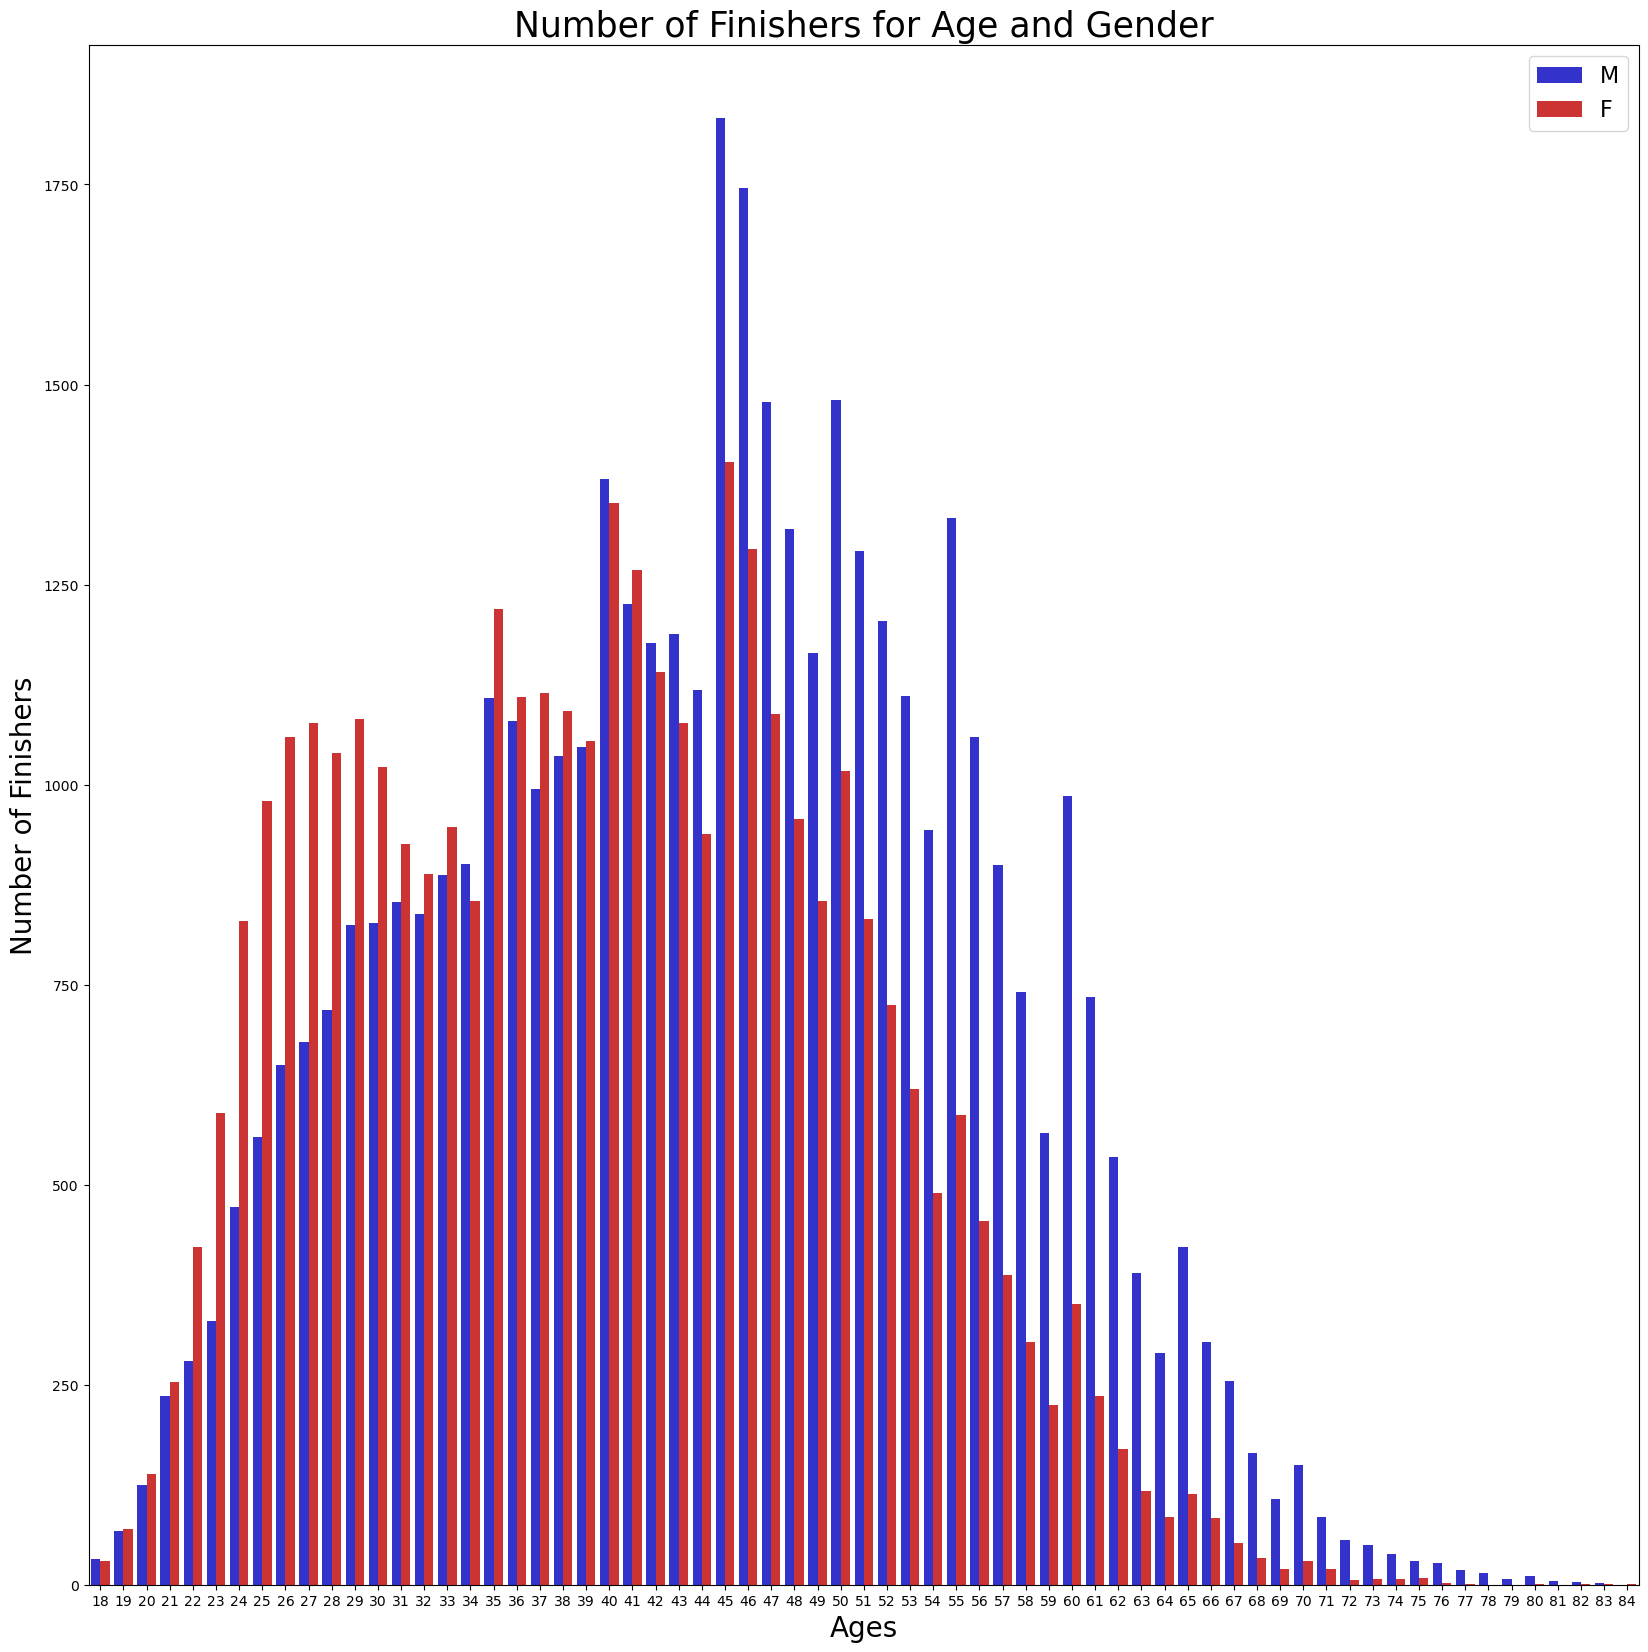

In [14]:
plt.figure(figsize=(20,20))
d = sns.countplot(x='Age', hue='M/F', data=test_df, palette={'F':'r','M':'b'}, saturation=0.6)
d.set_title('Number of Finishers for Age and Gender', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of Finishers',fontdict={'size':20})
d.legend(fontsize=16)
plt.show()

In [15]:
test_df.rename(columns={'M/F': 'Gender'}, inplace=True)

In [16]:
test_df

,Name,Age,Gender,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year
0,"Desisa, Lelisa",25,M,Ambo,N/A,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,N/A,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015
2,"Chebet, Wilson",29,M,Marakwet,N/A,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015
3,"Kipyego, Bernard",28,M,Eldoret,N/A,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015
4,"Korir, Wesley",32,M,Kitale,N/A,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26405,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,46.733333,95.683333,143.583333,192.733333,203.516667,252.100000,303.133333,355.300000,406.950000,16.400000,429.650000,2017
26406,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,32.050000,65.550000,112.283333,169.683333,180.433333,230.316667,290.016667,353.800000,414.350000,16.666667,436.983333,2017
26407,"Hantel, Johanna",57,F,Malvern,PA,USA,53.183333,103.600000,152.600000,0.000000,216.400000,255.350000,306.616667,360.550000,414.633333,16.783333,439.616667,2017
26408,"Reilly, Bill",64,M,New York,NY,USA,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,2017


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

print(test_df.head())

print(test_df['Gender'].unique())

print(test_df['Age'].unique())

print(test_df['Country'].unique())

print(test_df.describe())


                    Name  Age Gender         City State Country         5K  \
0         Desisa, Lelisa   25      M         Ambo   N/A     ETH  14.716667   
1  Tsegay, Yemane Adhane   30      M  Addis Ababa   N/A     ETH  14.716667   
2         Chebet, Wilson   29      M     Marakwet   N/A     KEN  14.716667   
3       Kipyego, Bernard   28      M      Eldoret   N/A     KEN  14.716667   
4          Korir, Wesley   32      M       Kitale   N/A     KEN  14.716667   

         10K        15K        20K       Half        25K        30K  \
0  29.716667  44.950000  60.483333  64.033333  76.116667  92.000000   
1  29.716667  44.966667  60.466667  64.016667  76.116667  91.983333   
2  29.716667  44.950000  60.483333  64.033333  76.116667  92.000000   
3  29.733333  45.016667  60.483333  64.033333  76.116667  92.000000   
4  29.733333  44.966667  60.466667  64.016667  76.116667  92.000000   

          35K         40K      Pace  Official Time  Year  
0  107.983333  122.650000  4.933333     129.2

               5K        10K        15K         20K        Half         25K  \
Gender                                                                        
F       26.754013  53.697401  81.143919  109.405014  115.485341  138.309886   
M       24.243601  48.501616  73.160336   98.494671  104.038334  124.601373   

               30K         35K         40K      Pace  Official Time  
Gender                                                               
F       168.707771  200.168598  230.994661  9.331727     244.450440  
M       152.289698  181.465964  210.823338  8.543653     223.781861  


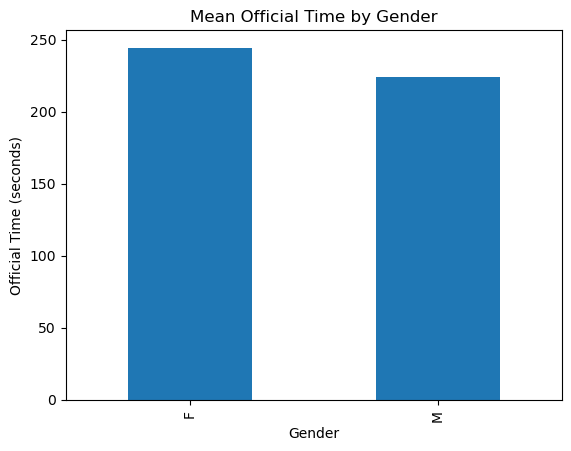

In [18]:

gender_group = test_df.groupby('Gender').mean()[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]

print(gender_group)

gender_group.plot(kind='bar', y='Official Time', legend=False)
plt.title('Mean Official Time by Gender')
plt.ylabel('Official Time (seconds)')
plt.show()


            5K        10K         15K         20K        Half         25K  \
Age                                                                         
18   27.787634  56.145968   82.632527  111.290860  117.351613  143.264516   
19   25.562287  51.283820   77.510462  104.710219  110.531022  133.225061   
20   24.937816  49.934407   75.276136  102.070518  107.352462  130.034659   
21   24.982072  50.079073   75.452863  101.814656  107.477471  129.245842   
22   25.475844  51.117998   77.001498  103.853543  109.610984  131.378554   
..         ...        ...         ...         ...         ...         ...   
80   30.409722  62.001389   94.265278  128.202778  135.337500  162.473611   
81   31.693333  64.330000   97.380000  131.313333  138.816667  167.563333   
82   33.837500  68.383333  104.479167  142.379167  150.758333  180.920833   
83   31.644444  64.183333   97.516667  132.755556  140.466667  169.227778   
84   36.683333  77.433333  119.233333  162.000000  171.366667  205.333333   

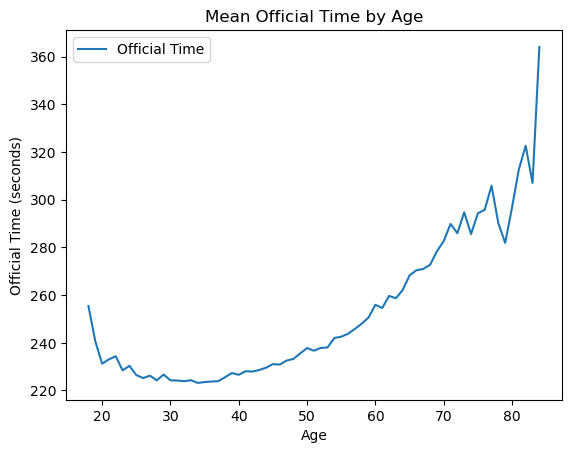

In [19]:
age_group = test_df.groupby('Age').mean()[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]

print(age_group)

age_group.plot(kind='line', y='Official Time')
plt.title('Mean Official Time by Age')
plt.ylabel('Official Time (seconds)')
plt.show()


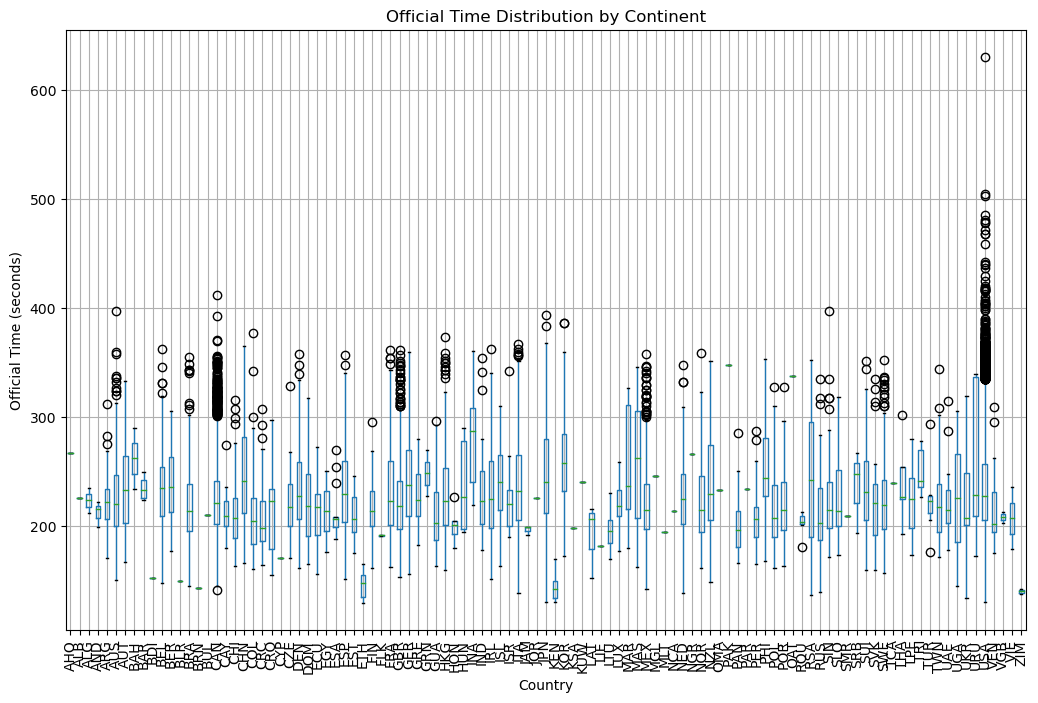

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

test_df.boxplot(column='Official Time', by='Country', figsize=(12,8))
plt.title('Official Time Distribution by Continent')
plt.suptitle('')
plt.ylabel('Official Time (seconds)')
plt.xticks(rotation=90)
plt.show()




'ETH' 'KEN' 'USA' 'UKR' 'RSA' 'ITA' 'RUS' 'JPN' 'CAN' 'BEL' 'NZL' 'BLR'
 'AUS' 'GBR' 'CRO' 'ECU' 'GER' 'ESP' 'SWE' 'BRA' 'HKG' 'MEX' 'DEN' 'MAS'
 'IRL' 'ISL' 'CHI' 'GUA' 'FIN' 'SVK' 'COL' 'SUI' 'CHN' 'AUT' 'NED' 'FRA'
 'CRC' 'CYP' 'POL' 'NOR' 'KOR' 'POR' 'TPE' 'PER' 'SIN' 'PAN' 'VEN' 'LUX'
 'CZE' 'VIE' 'MAR' 'BER' 'ROU' 'IND' 'LIE' 'ARG' 'ESA' 'DOM' 'ISR' 'GRE'
 'SLO' 'LTU' 'URU' 'CAY' 'EST' 'JAM' 'UAE' 'VGB' 'TUR' 'LAT' 'AND' 'OMA'
 'BAH' 'TRI' 'INA' 'AHO' 'PHI' 'UGA' 'QAT' 'ZIM' 'TWN' 'HON' 'FLK' 'HUN'
 'JOR' 'ALB' 'SRB' 'PAK' 'BRN' 'BDI' 'EGY' 'THA' 'MLT' 'KSA' 'SMR' 'BUL'
 'ALG' 'NCA' 'BAR' 'GRN' 'PAR' 'TCA' 'KUW' 'MGL' 'NGR'

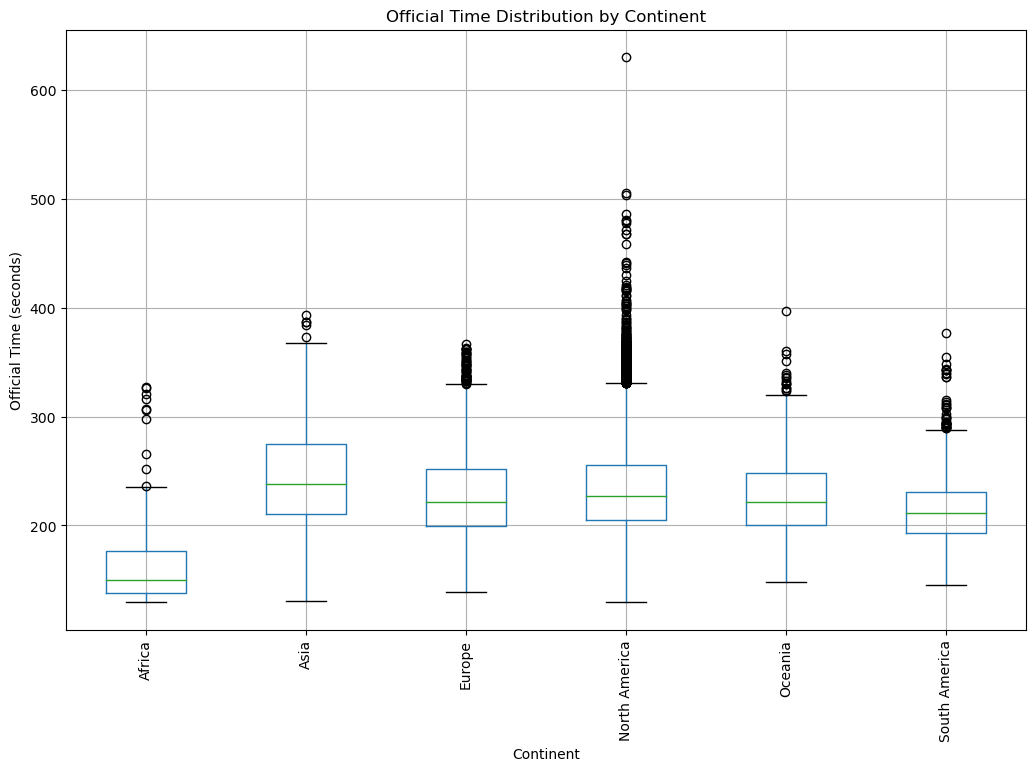

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

continent_map = {'North America': ['USA', 'CAN', 'MEX'],
                 'South America': ['BRA', 'ECU', 'PER', 'CHI', 'ARG', 'VEN', 'COL', 'ESA', 'URU', 'PAR', 'BAR', 'GRN'],
                 'Europe': ['ITA', 'UK', 'CHE', 'ESP', 'IRL', 'FRA', 'NLD', 'SWE', 'DNK', 'NOR', 'FIN', 'BEL', 'AUT', 'POL', 'PRT', 'RUS', 'CZE', 'HUN', 'GRC', 'ROU', 'GBR', 'CRO', 'BLR', 'ISR', 'ISL', 'CYP', 'LIE', 'SLO', 'LTU', 'EST', 'LUX', 'LAT', 'AND', 'SRB', 'ALB', 'SMR', 'BUL'],
                 'Africa': ['KEN', 'ETH', 'ZAF', 'MAR', 'UGA', 'NGR', 'BDI', 'ZIM', 'ALG'],
                 'Asia': ['JPN', 'CHN', 'KOR', 'TWN', 'HKG', 'SGP', 'THA', 'PHL', 'IND', 'QAT', 'ARE', 'JOR', 'LBN', 'BHR', 'OMN', 'KWT', 'IRN', 'VIE', 'PAK', 'BRN', 'INA', 'TUR', 'KSA', 'KAZ', 'KGZ', 'UZB'],
                 'Oceania': ['AUS', 'NZL']}

country_to_continent = {}
for continent, countries in continent_map.items():
    for country in countries:
        country_to_continent[country] = continent

test_df['Continent'] = test_df['Country'].map(country_to_continent)

test_df.boxplot(column='Official Time', by='Continent', figsize=(12,8))
plt.title('Official Time Distribution by Continent')
plt.suptitle('')
plt.ylabel('Official Time (seconds)')
plt.xticks(rotation=90)
plt.show()




In [22]:
test_df.drop(['Name'], axis=1)

,Age,Gender,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year,Continent
0,25,M,Ambo,N/A,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015,Africa
1,30,M,Addis Ababa,N/A,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015,Africa
2,29,M,Marakwet,N/A,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015,Africa
3,28,M,Eldoret,N/A,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015,Africa
4,32,M,Kitale,N/A,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26405,61,F,Ontario,CA,USA,46.733333,95.683333,143.583333,192.733333,203.516667,252.100000,303.133333,355.300000,406.950000,16.400000,429.650000,2017,North America
26406,25,M,Fayetteville,NC,USA,32.050000,65.550000,112.283333,169.683333,180.433333,230.316667,290.016667,353.800000,414.350000,16.666667,436.983333,2017,North America
26407,57,F,Malvern,PA,USA,53.183333,103.600000,152.600000,0.000000,216.400000,255.350000,306.616667,360.550000,414.633333,16.783333,439.616667,2017,North America
26408,64,M,New York,NY,USA,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,2017,North America


In [23]:
test_df['Gender'] = test_df['Gender'].map({'M': 1, 'F': 0})

In [24]:
test1_df = test_df.drop(['Name', 'City', 'State', 'Country', 'Continent'], axis=1)

In [34]:
test1_df

,Age,Gender,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year
0,25,1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015
1,30,1,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015
2,29,1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015
3,28,1,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015
4,32,1,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26405,61,0,46.733333,95.683333,143.583333,192.733333,203.516667,252.100000,303.133333,355.300000,406.950000,16.400000,429.650000,2017
26406,25,1,32.050000,65.550000,112.283333,169.683333,180.433333,230.316667,290.016667,353.800000,414.350000,16.666667,436.983333,2017
26407,57,0,53.183333,103.600000,152.600000,0.000000,216.400000,255.350000,306.616667,360.550000,414.633333,16.783333,439.616667,2017
26408,64,1,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,2017


In [35]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# select only the 'Age' and 'Official Time' columns for outlier detection
X = test1_df[['Age', 'Official Time']]

# fit the isolation forest model
clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(X)

# get the predictions
y_pred = clf.predict(X)

# filter outliers and create cleaned data
cleaned_data = test1_df[y_pred == 1]

# print the number of outliers and clean data points
num_outliers = len(test1_df[y_pred == -1])
num_clean = len(cleaned_data)
print(f"Number of outliers: {num_outliers}")
print(f"Number of clean data points: {num_clean}")


Number of outliers: 21857
Number of clean data points: 57781


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_data.drop(['Official Time', 'Age'], axis=1), cleaned_data['Official Time'], test_size=0.2, random_state=42)

# Fit the linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model's performance using mean absolute error, mean squared error, and R-squared
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.20284639399075388
Mean Squared Error: 0.21202447443634628
R-squared: 0.9996749775997924


### Prediction Model to predict Official Time of a runner based on new runner's data

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# separate the features and target variable
X = cleaned_data.drop('Official Time', axis=1)
y = cleaned_data['Official Time']

# train a linear regression model
model = LinearRegression()
model.fit(X, y)

# make predictions on new data
new_data = pd.DataFrame({'Age': [25, 30], 
                         'Gender': [0, 1], 
                         '5K': [20.5, 18.9],
                         '10K': [41.2, 39.6],
                         '15K': [63.5, 61.9],
                         '20K': [86.2, 84.6],
                         'Half': [92.5, 89.3],
                         '25K': [108.4, 106.8],
                         '30K': [131.2, 129.6],
                         '35K': [153.5, 151.9],
                         '40K': [176.2, 174.6],
                         'Pace': [8, 8],
                          'Year':[2019, 2020]})
predictions = model.predict(new_data)
print(predictions)


[208.05952599 208.05046313]


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# separate the features and target variable
X = cleaned_data[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace']]
y = cleaned_data['Gender']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))


Accuracy: 0.7019901932506489
Precision: 0.7117253948967193
Recall: 0.7519255455712451
F1-score: 0.7312734082397003


/Users/parth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# separate the features and target variable
X = cleaned_data[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace']]
y = cleaned_data['Gender']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[3505 1831]
 [1560 4661]]


/Users/parth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define the values from the confusion matrix
y_true = [1]*8808 + [0]*7120 # 1 is female, 0 is male
y_pred = [1]*6659 + [0]*3049 + [1]*2149 + [0]*4071

# calculate the performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7301607232546459
Precision: 0.7560172570390554
Recall: 0.7560172570390554
F1-score: 0.7560172570390555


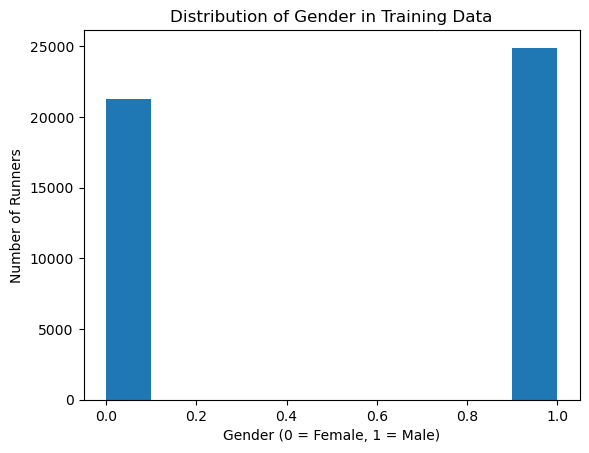

In [47]:
import matplotlib.pyplot as plt

# plot the distribution of the target variable in the training data
plt.hist(y_train)
plt.title('Distribution of Gender in Training Data')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Runners')
plt.show()


### Prediction Model to predict Gender of a runner based on new runner's data

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# separate the features and target variable
X = cleaned_data[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace']]
y = cleaned_data['Gender']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# evaluate the model
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f'Training accuracy: {train_acc}')
print(f'Testing accuracy: {test_acc}')

# make predictions on the new runner's split times
new_runner = pd.DataFrame({'5K': [34.5],
                           '10K': [68.2],
                           '15K': [101.5],
                           '20K': [134.2],
                           'Half': [142.5],
                           '25K': [169.4],
                           '30K': [200.2],
                           '35K': [237.5],
                           '40K': [272.2],
                           'Pace': [11]})
gender = model.predict(new_runner)[0]

# display the predicted gender of the new runner
if gender == 0:
    print('The predicted gender of the new runner is female.')
else:
    print('The predicted gender of the new runner is male.')
    
plt.show()


Training accuracy: 0.9997836621668398
Testing accuracy: 0.7212079259323354
The predicted gender of the new runner is female.


In [61]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split dataset into features (X) and target variable (y)
X = test1_df.iloc[:, :-1]
y = test1_df.iloc[:, -1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set
clf.fit(X_train, y_train)

# Predict age group of runners in the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.4213962832747363
Precision: 0.420943141816346
Recall: 0.4213962832747363
F1-score: 0.4209825739192705


### Prediction Model to predict Age of a runner based on new runner's data

In [65]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# select features and target
X = test1_df[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']]
y = test1_df['Age']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create decision tree classifier
classifier = DecisionTreeClassifier()

# train model
classifier.fit(X_train, y_train)

# make predictions on test set
y_pred = classifier.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1-score: {}".format(f1))

# predict age group for a new runner
new_runner = pd.DataFrame([[10, 23, 32, 44, 55, 67, 88, 108, 129]], columns=['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K'])
predicted_age_group = classifier.predict(new_runner)

print("Predicted age group for new runner: {}".format(predicted_age_group))


Accuracy: 0.034279256654947264
Precision: 0.03413753587423755
Recall: 0.034279256654947264
F1-score: 0.03415324735837457
Predicted age group for new runner: [27]


/Users/parth/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/parth/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
